=== DOWNLOADING AND LOADING DATA ===
Data loaded successfully!
Dataset shape: (20640, 10)

First 5 rows:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462         

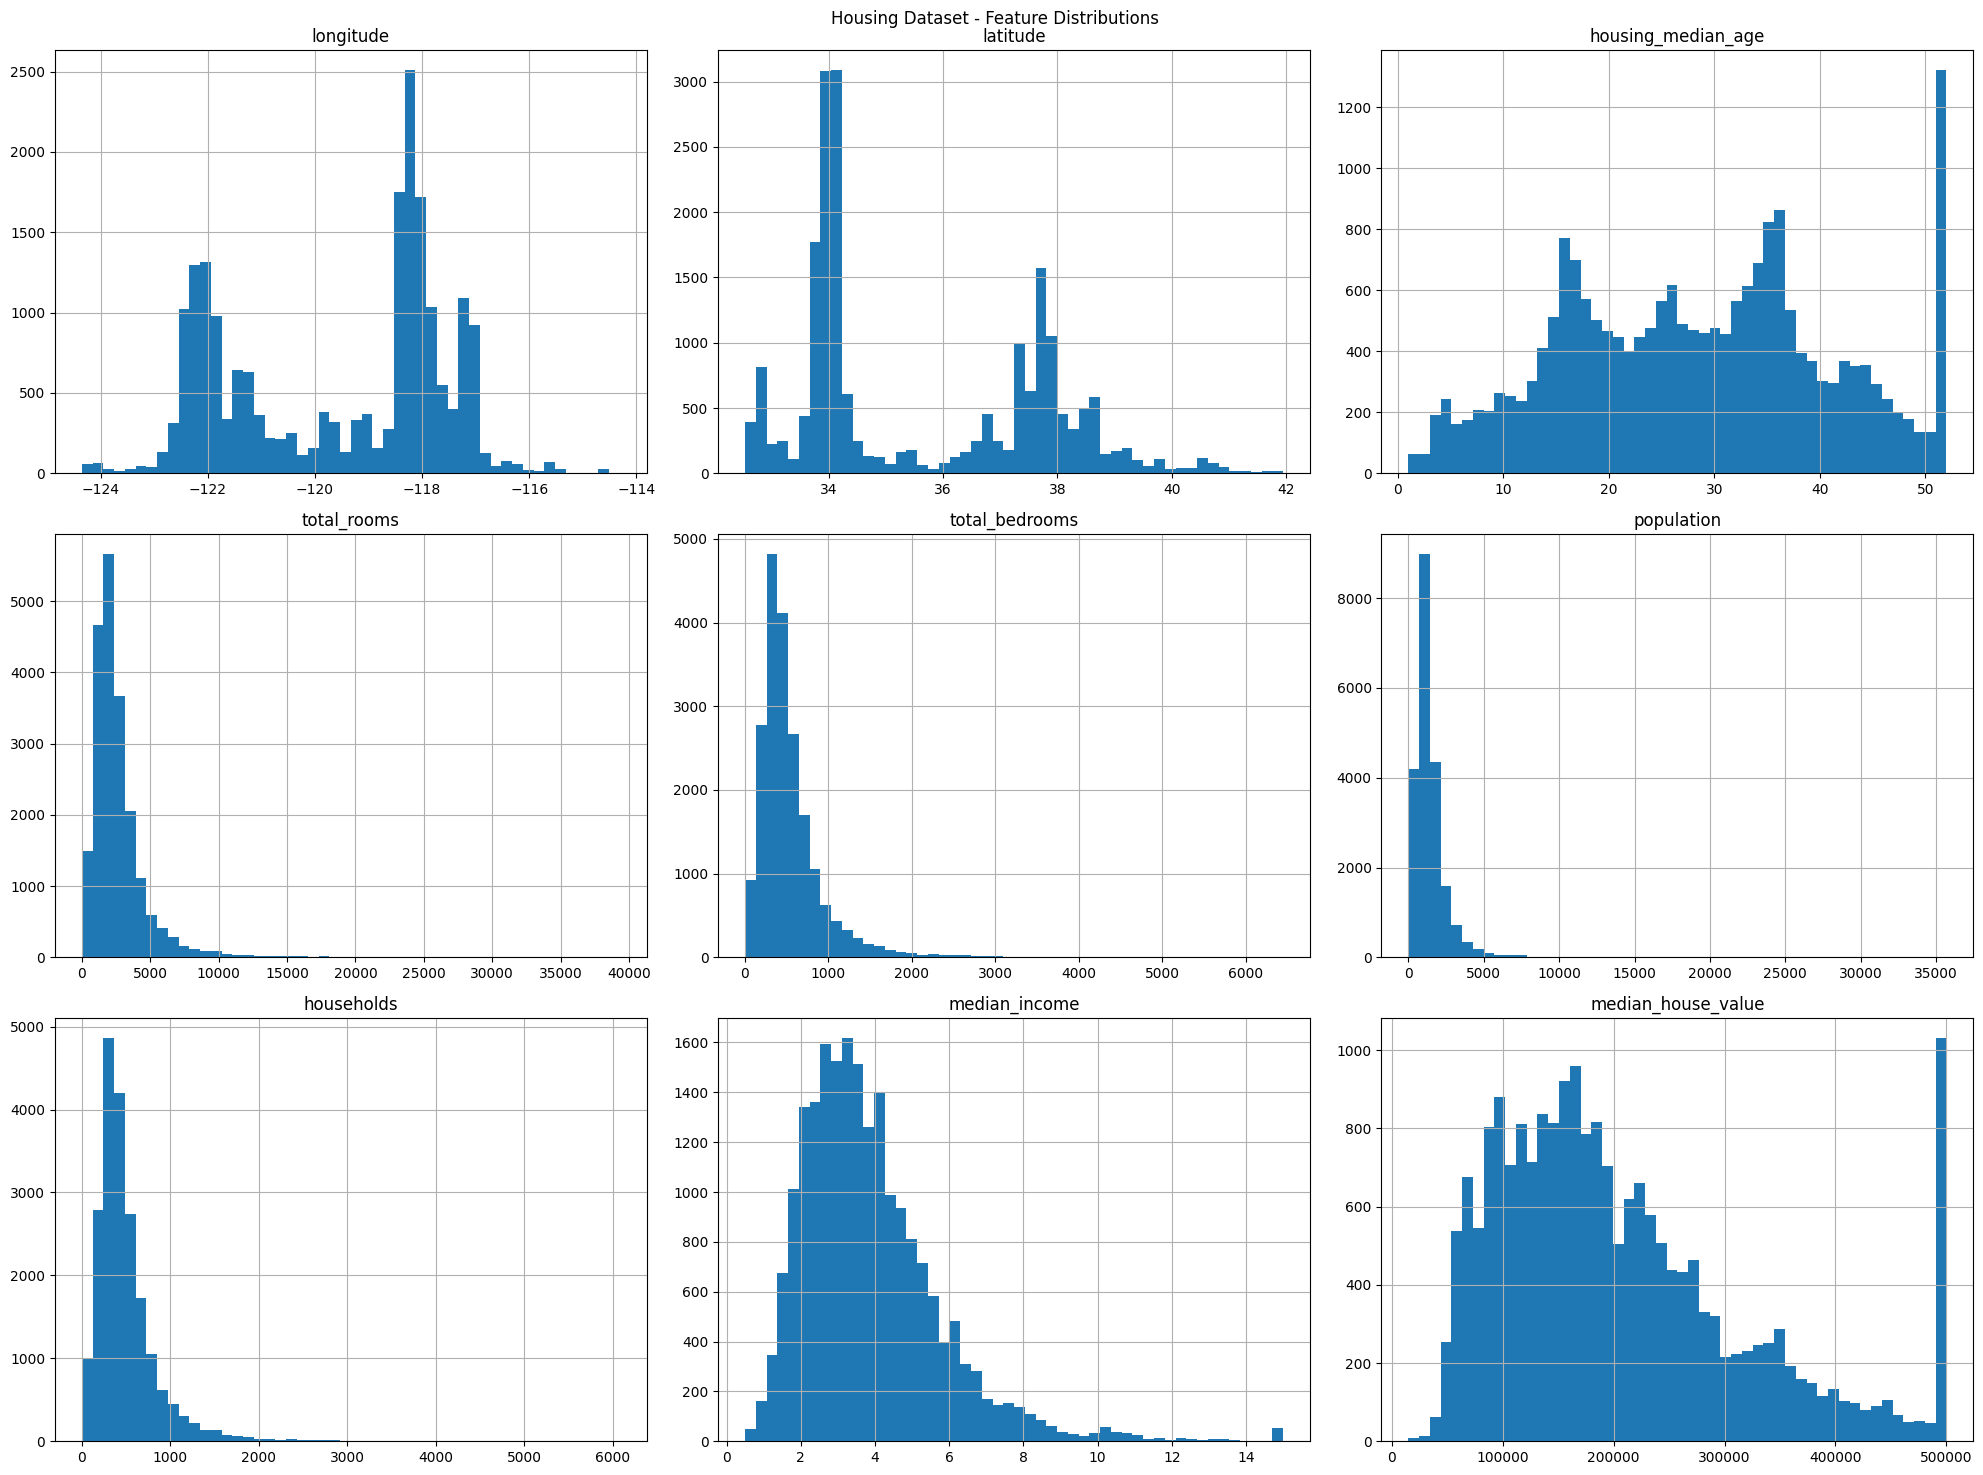


Creating scatter plots...


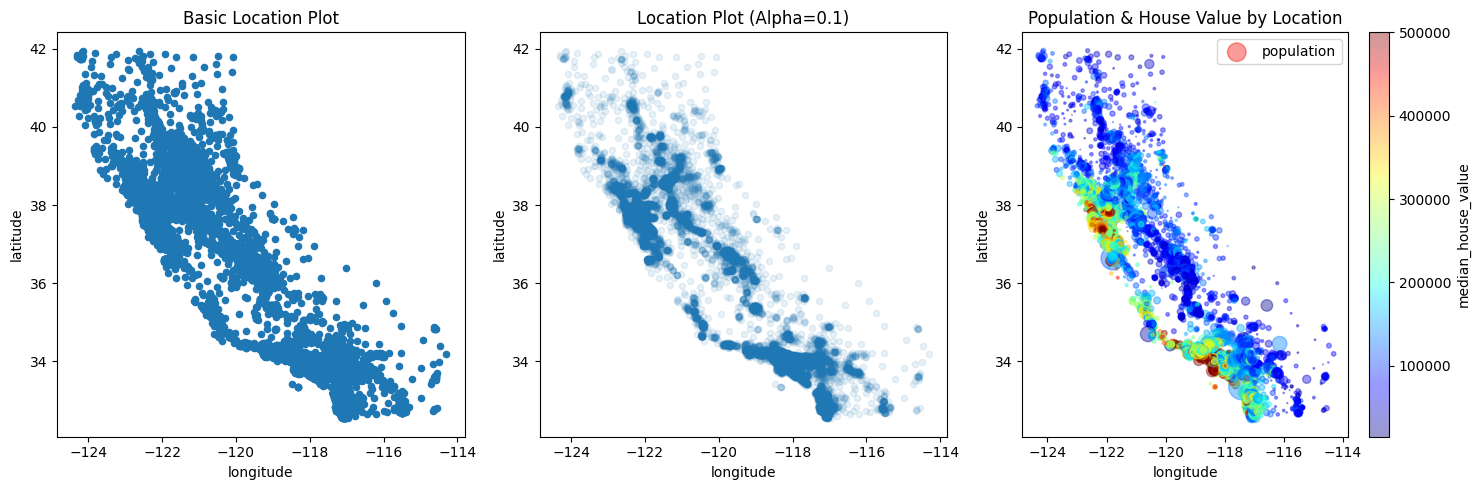


Original correlation analysis:
Correlations with median_house_value:
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


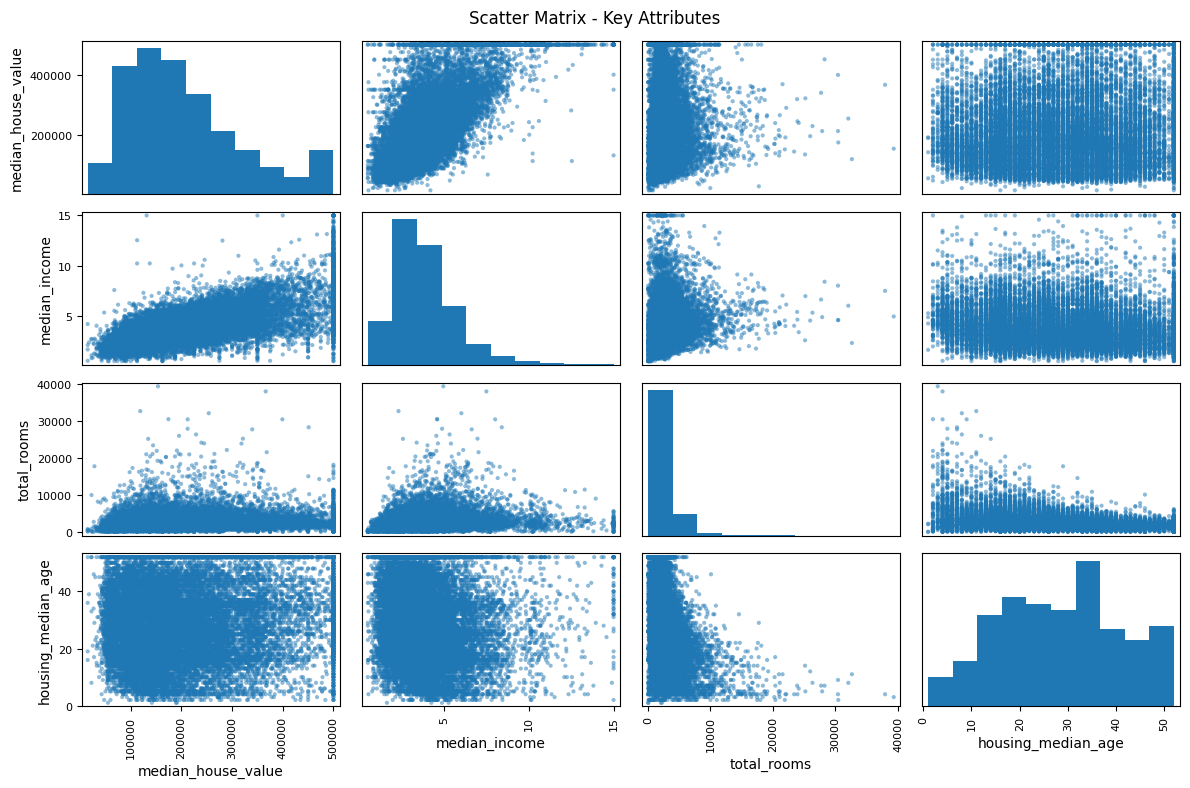


=== STEP 1: DATA EXPLORATION AND ATTRIBUTE COMBINATIONS ===

1. Creating new attribute combinations...

Correlations with median_house_value (including new attributes):
median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

=== STEP 2: CREATE STRATIFIED TRAINING/TEST SETS ===
Training set size: 16512
Test set size: 4128

=== STEP 3: DATA CLEANING ===

3. Handling missing values...
Missing values per column:
longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              1

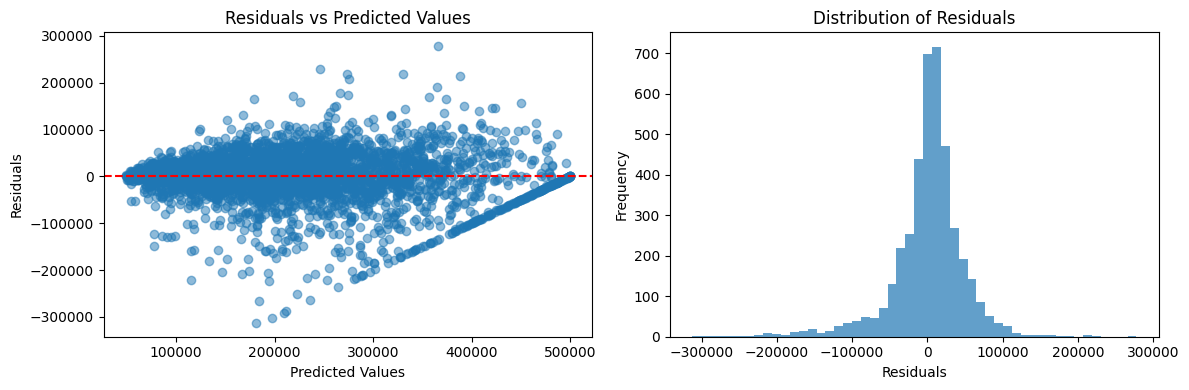


10 Worst Predictions:
1. Index 6702: Predicted=$180,587, Actual=$493,200, Error=$-312,613
2. Index 4644: Predicted=$197,053, Actual=$500,001, Error=$-302,948
3. Index 15288: Predicted=$209,280, Actual=$500,001, Error=$-290,721
4. Index 15303: Predicted=$211,857, Actual=$500,001, Error=$-288,144
5. Index 8222: Predicted=$365,460, Actual=$87,500, Error=$277,960
6. Index 15635: Predicted=$184,267, Actual=$450,000, Error=$-265,733
7. Index 15652: Predicted=$235,710, Actual=$500,001, Error=$-264,291
8. Index 4642: Predicted=$223,083, Actual=$475,000, Error=$-251,917
9. Index 10798: Predicted=$264,123, Actual=$500,001, Error=$-235,878
10. Index 5887: Predicted=$246,230, Actual=$17,500, Error=$228,730

=== ENSEMBLE METHODS (BONUS) ===

10. Testing Ensemble Methods...
Ensemble RMSE: $52,611

=== SUMMARY ===
Best Individual Model: Random Forest with parameters {'max_features': 8, 'n_estimators': 30}
Cross-validation RMSE: $50,982
Test set RMSE: $48,689
Test set MAE: $32,469
Ensemble RMSE: $52,

In [2]:
# Complete California Housing ML Pipeline - Integrated Version
import os
import tarfile
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from scipy.stats import randint
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

# === ORIGINAL DATA DOWNLOAD AND LOADING CODE ===
print("=== DOWNLOADING AND LOADING DATA ===")

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()

print("Data loaded successfully!")
print(f"Dataset shape: {housing.shape}")
print("\nFirst 5 rows:")
print(housing.head())

print("\nDataset info:")
housing.info()

print("\nOcean proximity distribution:")
print(housing["ocean_proximity"].value_counts())

print("\nDescriptive statistics:")
print(housing.describe())

# Original visualizations
print("\nCreating histograms...")
housing.hist(bins=50, figsize=(20,15))
plt.suptitle("Housing Dataset - Feature Distributions")
plt.tight_layout()
plt.show()

print("\nCreating scatter plots...")
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
housing.plot(kind="scatter", x="longitude", y="latitude", ax=plt.gca())
plt.title("Basic Location Plot")

plt.subplot(1, 3, 2)
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, ax=plt.gca())
plt.title("Location Plot (Alpha=0.1)")

plt.subplot(1, 3, 3)
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population",
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False, ax=plt.gca())
plt.legend()
plt.title("Population & House Value by Location")

plt.tight_layout()
plt.show()

# Original correlation analysis
print("\nOriginal correlation analysis:")
corr_matrix = housing.select_dtypes(include=['number']).corr()
print("Correlations with median_house_value:")
print(corr_matrix["median_house_value"].sort_values(ascending=False))

# Original scatter matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.suptitle("Scatter Matrix - Key Attributes")
plt.tight_layout()
plt.show()

# === START ML PIPELINE ===
print("\n" + "="*60)
print("=== STEP 1: DATA EXPLORATION AND ATTRIBUTE COMBINATIONS ===")
print("="*60)

# 1. EXPERIMENT WITH ATTRIBUTE COMBINATIONS
print("\n1. Creating new attribute combinations...")

# Create new features
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

# Check correlations with new attributes
corr_matrix = housing.select_dtypes(include=['number']).corr()
print("\nCorrelations with median_house_value (including new attributes):")
print(corr_matrix["median_house_value"].sort_values(ascending=False))

# 2. CREATE TRAINING AND TEST SETS WITH STRATIFIED SAMPLING
print("\n=== STEP 2: CREATE STRATIFIED TRAINING/TEST SETS ===")

# Create income categories for stratified sampling
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# Remove the income_cat attribute
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

print(f"Training set size: {len(strat_train_set)}")
print(f"Test set size: {len(strat_test_set)}")

# Separate features and target
housing_features = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

print("\n=== STEP 3: DATA CLEANING ===")

# 3. DATA CLEANING
print("\n3. Handling missing values...")
print(f"Missing values per column:\n{housing_features.isnull().sum()}")

# 4. CUSTOM TRANSFORMERS
print("\n=== STEP 4: CUSTOM TRANSFORMERS ===")

# Custom transformer to add combination attributes
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# 5. TRANSFORMATION PIPELINES
print("\n=== STEP 5: TRANSFORMATION PIPELINES ===")

# Numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

# Get numerical and categorical columns
housing_num = housing_features.select_dtypes(include=[np.number])
housing_cat = housing_features.select_dtypes(exclude=[np.number])

print(f"Numerical columns: {list(housing_num.columns)}")
print(f"Categorical columns: {list(housing_cat.columns)}")

# Full pipeline
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, list(housing_num.columns)),
    ("cat", OneHotEncoder(), list(housing_cat.columns)),
])

# Transform the data
print("\nTransforming training data...")
housing_prepared = full_pipeline.fit_transform(housing_features)
print(f"Prepared data shape: {housing_prepared.shape}")

print("\n=== STEP 6: SELECT AND TRAIN MODELS ===")

# 6. TRAIN DIFFERENT MODELS
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Machine": SVR(kernel="linear")
}

# Train and evaluate models
model_results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(housing_prepared, housing_labels)

    # Make predictions
    housing_predictions = model.predict(housing_prepared)

    # Calculate metrics
    mse = mean_squared_error(housing_labels, housing_predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(housing_labels, housing_predictions)

    model_results[name] = {
        'model': model,
        'rmse': rmse,
        'mae': mae
    }

    print(f"RMSE: ${rmse:,.0f}")
    print(f"MAE: ${mae:,.0f}")

print("\n=== STEP 7: CROSS-VALIDATION ===")

# 7. CROSS-VALIDATION
print("\nPerforming cross-validation...")
cv_results = {}

for name, result in model_results.items():
    model = result['model']

    # Perform cross-validation
    cv_scores = cross_val_score(model, housing_prepared, housing_labels,
                               scoring="neg_mean_squared_error", cv=10)
    cv_rmse_scores = np.sqrt(-cv_scores)

    cv_results[name] = {
        'scores': cv_rmse_scores,
        'mean': cv_rmse_scores.mean(),
        'std': cv_rmse_scores.std()
    }

    print(f"\n{name} CV Results:")
    print(f"Scores: {cv_rmse_scores}")
    print(f"Mean: ${cv_rmse_scores.mean():,.0f}")
    print(f"Standard deviation: ${cv_rmse_scores.std():,.0f}")

# Find best model from CV
best_cv_model = min(cv_results.items(), key=lambda x: x[1]['mean'])
print(f"\nBest model from CV: {best_cv_model[0]} (RMSE: ${best_cv_model[1]['mean']:,.0f})")

print("\n=== STEP 8: HYPERPARAMETER TUNING ===")

# 8. GRID SEARCH FOR RANDOM FOREST
print("\n8a. Grid Search for Random Forest...")

param_grid = [
    # Try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # Then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True, n_jobs=-1)

grid_search.fit(housing_prepared, housing_labels)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: ${np.sqrt(-grid_search.best_score_):,.0f}")

# Get feature importances
best_model = grid_search.best_estimator_
feature_importances = best_model.feature_importances_

# Get feature names
num_attribs = list(housing_num.columns)
extra_attribs = ["rooms_per_household", "pop_per_household", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

print("\nFeature Importances:")
for importance, attribute in sorted(zip(feature_importances, attributes), reverse=True):
    print(f"{attribute}: {importance:.4f}")

# 8b. RANDOMIZED SEARCH
print("\n8b. Randomized Search...")

param_distribs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                               n_iter=10, cv=5, scoring='neg_mean_squared_error',
                               random_state=42, n_jobs=-1)

rnd_search.fit(housing_prepared, housing_labels)

print(f"Best parameters: {rnd_search.best_params_}")
print(f"Best CV score: ${np.sqrt(-rnd_search.best_score_):,.0f}")

print("\n=== STEP 9: ANALYZE BEST MODEL AND ERRORS ===")

# 9. ANALYZE THE BEST MODEL
final_model = grid_search.best_estimator_

# Prepare test set
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

# Final test set performance
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_mae = mean_absolute_error(y_test, final_predictions)

print(f"\nFinal Test Set Performance:")
print(f"RMSE: ${final_rmse:,.0f}")
print(f"MAE: ${final_mae:,.0f}")

# Confidence interval for RMSE
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
interval = stats.t.interval(confidence, len(squared_errors) - 1,
                           loc=squared_errors.mean(),
                           scale=stats.sem(squared_errors))
rmse_interval = np.sqrt(interval)
print(f"RMSE 95% Confidence Interval: ${rmse_interval[0]:,.0f} - ${rmse_interval[1]:,.0f}")

# Error analysis
print("\nError Analysis:")
residuals = final_predictions - y_test
print(f"Mean residual: ${residuals.mean():,.0f}")
print(f"Residuals std: ${residuals.std():,.0f}")

# Plot residuals
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(final_predictions, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.axhline(y=0, color='r', linestyle='--')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=50, alpha=0.7)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")

plt.tight_layout()
plt.show()

# Identify worst predictions
error_abs = np.abs(residuals)
worst_indices = error_abs.argsort()[-10:][::-1]

print("\n10 Worst Predictions:")
for i, idx in enumerate(worst_indices):
    actual_idx = y_test.index[idx]
    print(f"{i+1}. Index {actual_idx}: Predicted=${final_predictions[idx]:,.0f}, "
          f"Actual=${y_test.iloc[idx]:,.0f}, Error=${residuals.iloc[idx]:,.0f}")

print("\n=== ENSEMBLE METHODS (BONUS) ===")
print("\n10. Testing Ensemble Methods...")

# Voting Regressor (combines multiple models)
from sklearn.ensemble import VotingRegressor

# Create ensemble of best models
ensemble_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(random_state=42))
]

voting_reg = VotingRegressor(ensemble_models)
voting_reg.fit(housing_prepared, housing_labels)

# Evaluate ensemble
ensemble_predictions = voting_reg.predict(X_test_prepared)
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
ensemble_rmse = np.sqrt(ensemble_mse)

print(f"Ensemble RMSE: ${ensemble_rmse:,.0f}")

print("\n=== SUMMARY ===")
print(f"Best Individual Model: Random Forest with parameters {grid_search.best_params_}")
print(f"Cross-validation RMSE: ${np.sqrt(-grid_search.best_score_):,.0f}")
print(f"Test set RMSE: ${final_rmse:,.0f}")
print(f"Test set MAE: ${final_mae:,.0f}")
print(f"Ensemble RMSE: ${ensemble_rmse:,.0f}")

print("\nTop 5 Most Important Features:")
top_features = sorted(zip(feature_importances, attributes), reverse=True)[:5]
for importance, feature in top_features:
    print(f"  {feature}: {importance:.4f}")

print("\nPipeline completed successfully!")